In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [24]:
data = pd.read_csv("C:/Users/rashe/Github - Projects/Retail-AI-Insights/AddedUnitPrice.csv")
data.head()

,Unnamed: 0,Manufacturer,PeriodID,WeekEndDate,FiscalYear,FiscalQuarter,FiscalMonth,FiscalWeek,ProductID,ProductDescription,...,Latitude,Longitude,Address_y,SalesDollarsMean,SalesDollarsSD,SalesQtyMean,SalesQtySD,FSA,Category,UnitPrice
0,0,General Mills,235,'2023-11-26 00:00:00',FY24,FY24-Q2,202406,202426,6013,PB RTB COOKIE DOUGH REESE 24CT CDA 454GR,...,54.140681,-115.671676,5005 DAHL DR,22.727464,17.364742,5.090318,4.107883,T7S,Cookie&BrownieDough,2.490
1,1,General Mills,235,'2023-11-26 00:00:00',FY24,FY24-Q2,202406,202426,6013,PB RTB COOKIE DOUGH REESE 24CT CDA 454GR,...,44.218869,-79.448238,23550 WOODBINE AVE,22.727464,17.364742,5.090318,4.107883,L4P,Cookie&BrownieDough,4.000
2,2,General Mills,235,'2023-11-26 00:00:00',FY24,FY24-Q2,202406,202426,6013,PB RTB COOKIE DOUGH REESE 24CT CDA 454GR,...,49.268053,-124.781845,3355 JOHNSTON RD,22.727464,17.364742,5.090318,4.107883,V9Y,Cookie&BrownieDough,4.000
3,3,General Mills,231,'2023-10-29 00:00:00',FY24,FY24-Q2,202405,202422,6013,PB RTB COOKIE DOUGH REESE 24CT CDA 454GR,...,49.267938,-124.784276,3455 JOHNSTON RD.,22.727464,17.364742,5.090318,4.107883,V9Y,Cookie&BrownieDough,7.490
4,4,General Mills,235,'2023-11-26 00:00:00',FY24,FY24-Q2,202406,202426,6013,PB RTB COOKIE DOUGH REESE 24CT CDA 454GR,...,49.267938,-124.784276,3455 JOHNSTON RD.,22.727464,17.364742,5.090318,4.107883,V9Y,Cookie&BrownieDough,7.495


In [25]:
print(data.columns)

Index(['Unnamed: 0', 'Manufacturer', 'PeriodID', 'WeekEndDate', 'FiscalYear',
       'FiscalQuarter', 'FiscalMonth', 'FiscalWeek', 'ProductID',
       'ProductDescription', 'UPC', 'AccountID', 'Banner', 'StoreName_x',
       'StoreNumber', 'Address_x', 'City', 'Province', 'PostalCode',
       'SalesQty', 'SalesDollars', 'CityCoding', 'ClusterMean', 'ClusterSTD',
       'CityMean', 'CitySTD', 'Diff_From_City_Mean', 'RowID', 'PostalID',
       'Postal_Lat', 'Postal_Long', 'Strength', 'StrengthCoding', 'ClusterID',
       'MasterID', 'StoreName_y', 'Retailer', 'Latitude', 'Longitude',
       'Address_y', 'SalesDollarsMean', 'SalesDollarsSD', 'SalesQtyMean',
       'SalesQtySD', 'FSA', 'Category', 'UnitPrice'],
      dtype='object')


In [26]:
data['CityCoding'].head()

0    1
1    2
2    3
3    3
4    3
Name: CityCoding, dtype: int64

In [ ]:
data = data.drop(columns=['Unnamed: 0'])
data = data.drop(columns=['SalesDollarsMean'])
data = data.drop(columns=['SalesDollarsSD'])
data = data.drop(columns=['SalesQtyMean'])
data = data.drop(columns=['SalesQtySD'])
data = data.drop(columns=['CityCoding'])
data = data.drop(columns=['ClusterMean'])
data = data.drop(columns=['ClusterSTD'])
data = data.drop(columns=['CityMean'])
data = data.drop(columns=['CitySTD'])
data = data.drop(columns=['Diff_From_City_Mean'])
data = data.drop(columns=['StrengthCoding'])
data = data.drop(columns=['Strength'])

In [37]:
df = data.copy()

In [38]:
null_values = df.isnull().sum()
print(null_values[null_values > 0])

Address_x      351594
Province          313
PostalCode       3184
Postal_Lat     152635
Postal_Long    152635
FSA              3184
dtype: int64


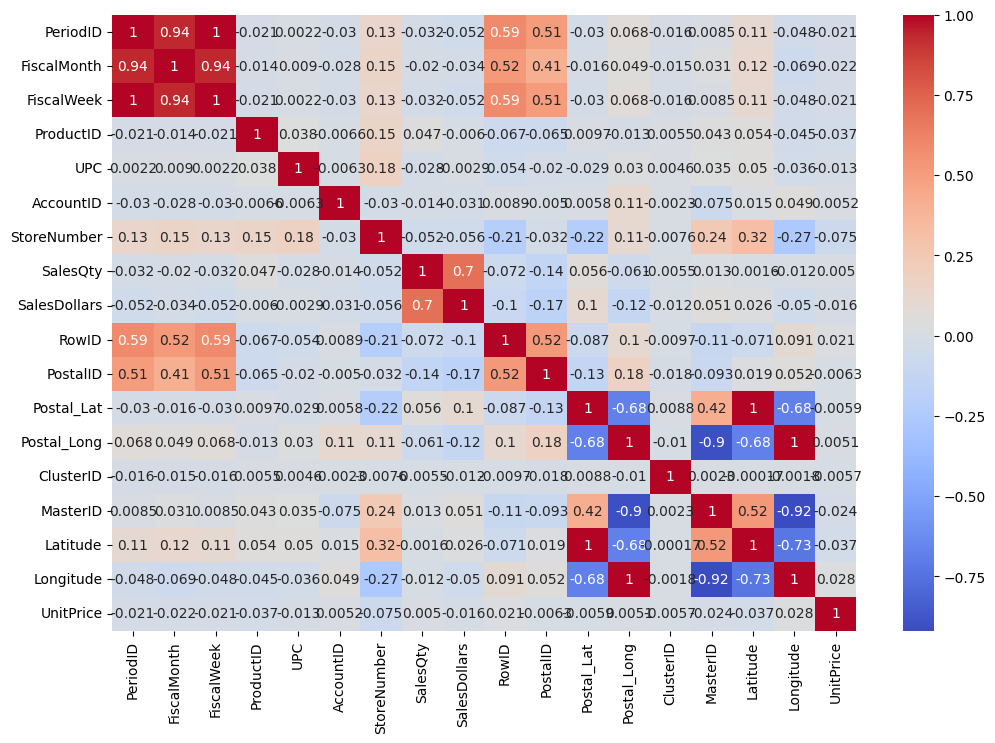

In [39]:
numeric_cols = df.select_dtypes(include=['int64', 'float64', 'int32']).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()